# Chart Library Notebook

This notebook will begin the basis for production level chart library using the agmktdb.

In [1]:
import os

# Data science
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Database
from sqlalchemy import create_engine
import psycopg2
import agmkt_pkg.nass as nass
import agmkt_pkg.ams as ams
import agmkt_pkg.env_vars as env_vars
import agmkt_pkg.utils as utils


print('Libraries imported!!')

Libraries imported!!


# Create SELECT statement to pull raw data

In [2]:
# create sql connection
user = env_vars.mktdb_user()
password = env_vars.mktdb_passwd()
server = env_vars.mktdb_server()


connection_string = f'postgresql://{user}:{password}@{server}/mktdb'
eng = create_engine(connection_string)
conn = eng.connect()

In [3]:
stmt_dict = {'commodity':'Corn', 'class':'Yellow', 'grade':'US #2', 
             'market_location_state':'VA', 'trade_loc':'Norfolk Terminal Area', 'delivery_point':'Terminal Elevators', 
             'freight':'Delivered', 'trans_mode':'Truck', 'current':'Yes'}

df = ams.df_grain_time_series_chart(stmt_dict, conn, table='mars_grain_bids')

print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 633 entries, 2021-04-01 to 2024-12-19
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_begin_date        633 non-null    datetime64[ns]
 1   report_end_date          633 non-null    datetime64[ns]
 2   published_date           633 non-null    datetime64[ns]
 3   office_name              633 non-null    object        
 4   office_city              633 non-null    object        
 5   office_state             633 non-null    object        
 6   market_type              633 non-null    object        
 7   market_location_name     633 non-null    object        
 8   market_location_city     0 non-null      object        
 9   market_location_state    633 non-null    object        
 10  slug_id                  633 non-null    int64         
 11  slug_name                633 non-null    object        
 12  report_title     

In [4]:
# stmt_dict = {'COMMODITY_DESC':'CORN', 'PRODN_PRACTICE_DESC':'ALL PRODUCTION PRACTICES', 
#              'UTIL_PRACTICE_DESC':'GRAIN', 
#             # 'CLASS_DESC':'OIL TYPE',
#              'STATISTICCAT_DESC':'AREA HARVESTED', 'UNIT_DESC':'ACRES', 'AGG_LEVEL_DESC':'NATIONAL', 'REFERENCE_PERIOD_DESC':'YEAR'}

# df = nass.df_time_series_chart(stmt_dict=stmt_dict, db_connect=conn)


# Manipulate data for data visualization

In [5]:
# print(df.info())

# df_trim = utils.keep_cols(df, default_cols=['SHORT_DESC'])

# print(df_trim.info())


# Create Visualziation and save image to folder

In [6]:
# scale_dict = {
#     'Unit':{'value':1, 'label':''},
#     'Thousand':{'value':1e3, 'label':'Thousand'},
#     'Million':{'value':1e6, 'label':'Million'},
#     'Billion':{'value':1e9, 'label':'Billion'},
# }

# df_viz = df[df['date'].dt.year >= df['date'].dt.year.max() - 50]

# str_commodity = stmt_dict['COMMODITY_DESC'].title()
# str_statistic = stmt_dict['STATISTICCAT_DESC'].title()
# str_unit = stmt_dict['UNIT_DESC'].title()

# plt.subplot()
# scale = 'Unit'
# scale_value = scale_dict[scale]['value']
# scale_label = scale_dict[scale]['label']
# sns.lineplot(data=df_viz, x='date', y=df['VALUE']/scale_value)
# sns.scatterplot(data=df_viz, x='date', y=df['VALUE']/scale_value)
# plt.title(f'U.S. {str_commodity} {str_statistic}')
# plt.ylabel(f'{scale_label} {str_unit}')
# plt.xlabel('Crop Year')
# plt.show()

In [7]:
# nass.time_series_chart(df, stmt_dict, './docs', years = 30, scale='Million')

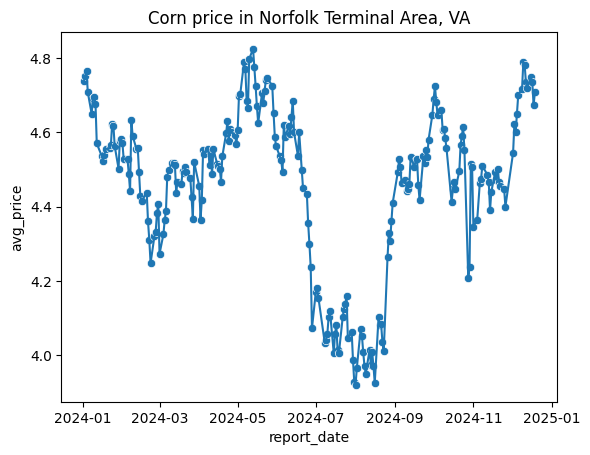

In [14]:
start_date = '2024-01-01'

df_viz = df[start_date:]

str_commodity = stmt_dict['commodity'].title()
str_location = stmt_dict['trade_loc'].title()
str_state = stmt_dict['market_location_state'].upper()

plt.subplot()
# scale = 'Unit'
# scale_value = scale_dict[scale]['value']
# scale_label = scale_dict[scale]['label']
sns.lineplot(data=df_viz, x=df_viz.index, y='avg_price')
sns.scatterplot(data=df_viz, x=df_viz.index, y='avg_price')
plt.title(f'{str_commodity} price in {str_location}, {str_state}')
# plt.ylabel(f'{scale_label} {str_unit}')
# plt.xlabel('Crop Year')
plt.show()